# About this notebook
### **Objective**:

Predict weight change (target variable) based on independent variables including caloric surplus/deficit, physical activity level, age, and stress level.

### **Hypothesis**:

Factors such as caloric surplus/deficit, activity level, age, and stress impact weight change, with a higher caloric surplus/deficit expected to result in a proportional change in weight.

# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import PartialDependenceDisplay

# Data Profiling

In [2]:
df = pd.read_csv('weight_change_dataset.csv')

In [3]:
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [4]:
df.dtypes

Participant ID                     int64
Age                                int64
Gender                            object
Current Weight (lbs)             float64
BMR (Calories)                   float64
Daily Calories Consumed          float64
Daily Caloric Surplus/Deficit    float64
Weight Change (lbs)              float64
Duration (weeks)                   int64
Physical Activity Level           object
Sleep Quality                     object
Stress Level                       int64
Final Weight (lbs)               float64
dtype: object

In [5]:
print(f'Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}')

Number of Rows: 100
Number of Columns: 13


In [6]:
df.isnull().sum()

Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64

In [7]:
for col in df.columns:
    print(f'\n{df[col].value_counts()}\n=================================')


Participant ID
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64

Age
41    6
25    5
56    4
42    4
32    4
38    4
31    4
24    4
19    4
52    3
43    3
21    3
35    3
26    3
45    3
46    3
59    3
28    3
57    3
53    3
34    2
18    2
58    2
33    2
39    2
20    2
50    2
40    2
48    1
27    1
51    1
23    1
29    1
36    1
37    1
54    1
47    1
55    1
44    1
22    1
Name: count, dtype: int64

Gender
M    57
F    43
Name: count, dtype: int64

Current Weight (lbs)
100.0    3
181.9    2
181.3    2
214.4    2
169.9    2
        ..
206.5    1
169.3    1
180.7    1
151.4    1
185.2    1
Name: count, Length: 94, dtype: int64

BMR (Calories)
3102.3    1
2218.5    1
2261.5    1
2385.0    1
2120.5    1
         ..
3004.2    1
2627.2    1
2433.3    1
2318.0    1
2830.7    1
Name: count, Length: 100, dtype: int64

Daily Calories Consumed
4000.0    34
3916.0     1
2724.7     1
3199.8     1


# Exploratory Data Analysis

In [8]:
# Set up for clear visualizations
sns.set(style="whitegrid")

In [9]:
# Separate categorical and continuous features for appropriate visualization
categorical_features = ['Gender', 'Physical Activity Level', 'Sleep Quality']
continuous_features = [
    'Age', 'Current Weight (lbs)', 'BMR (Calories)', 'Daily Calories Consumed',
    'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)', 'Stress Level', 'Final Weight (lbs)'
]

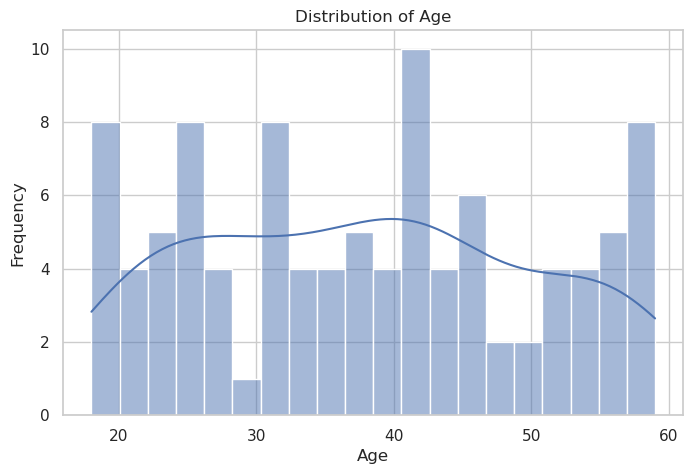

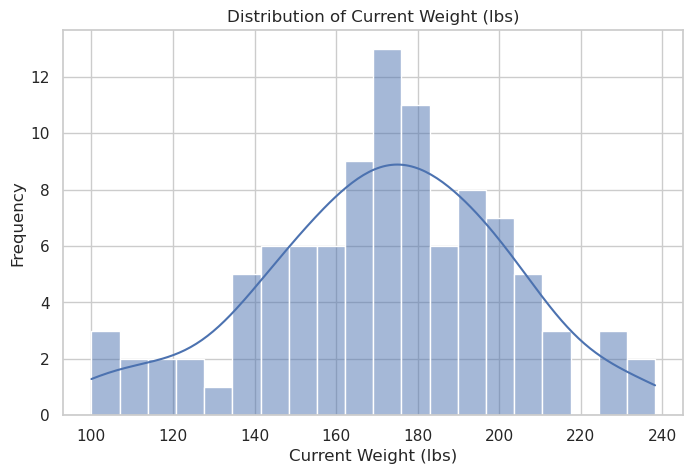

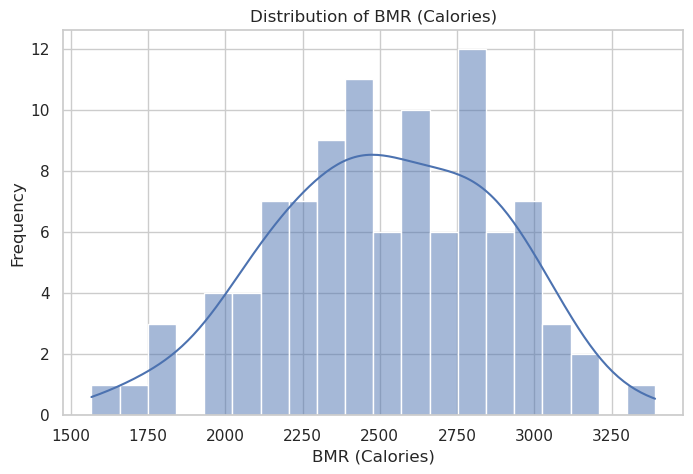

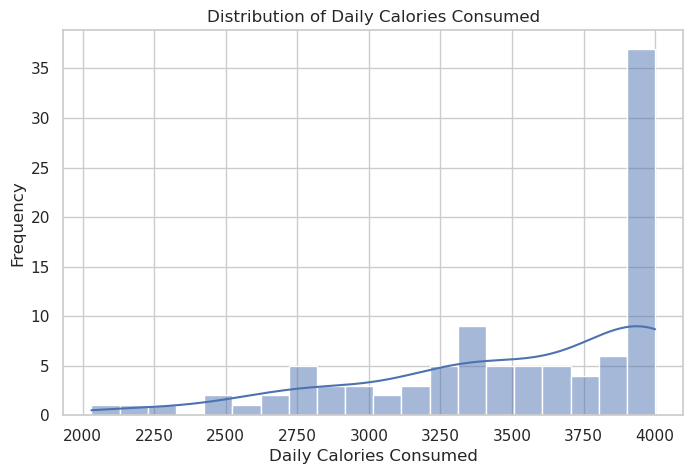

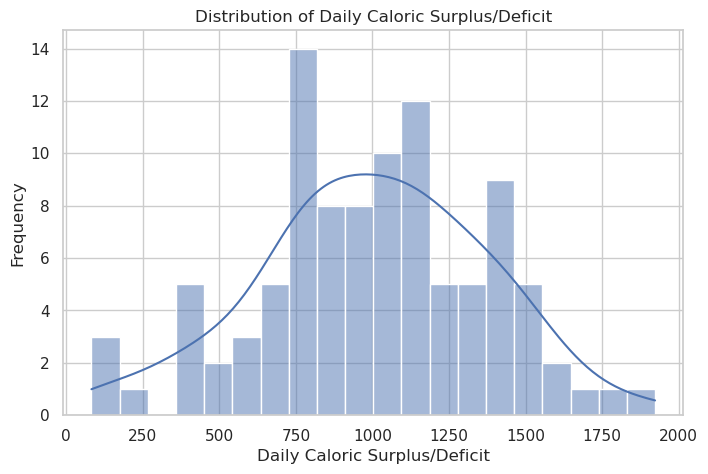

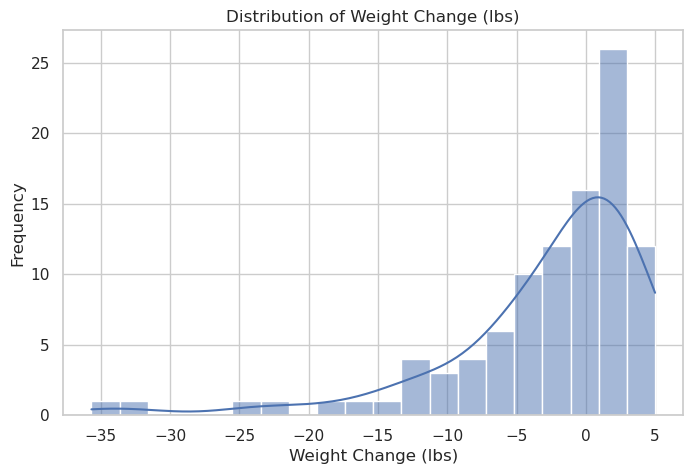

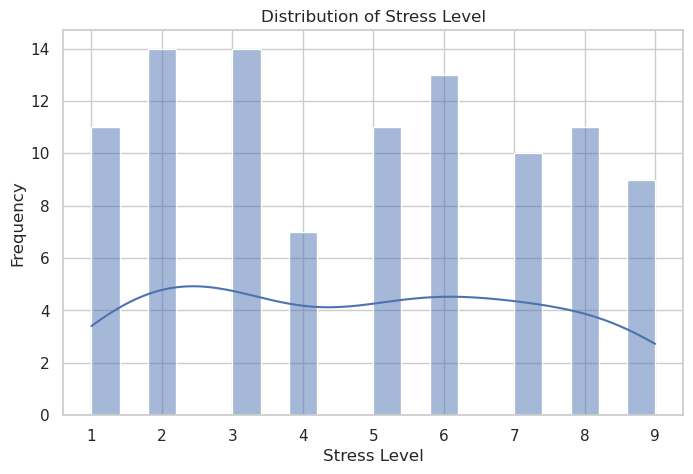

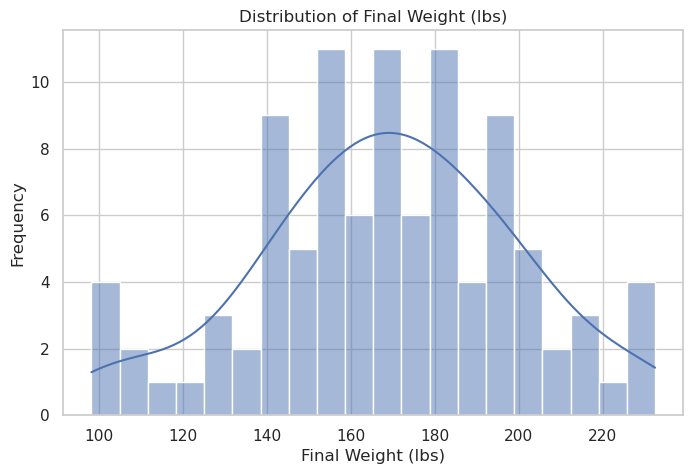

In [10]:
# Univariate Analysis: Histograms for continuous variables
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

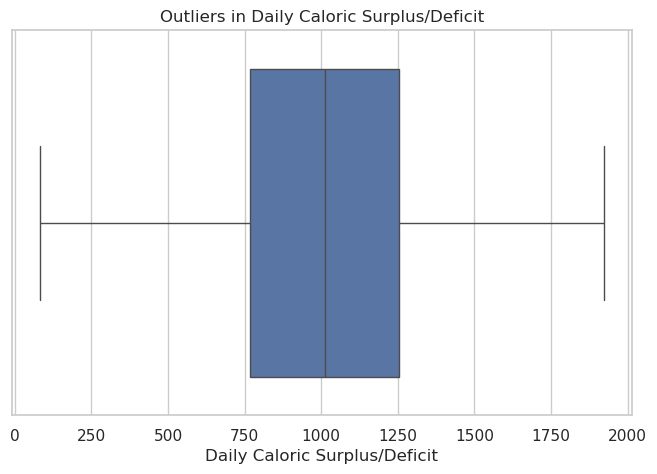

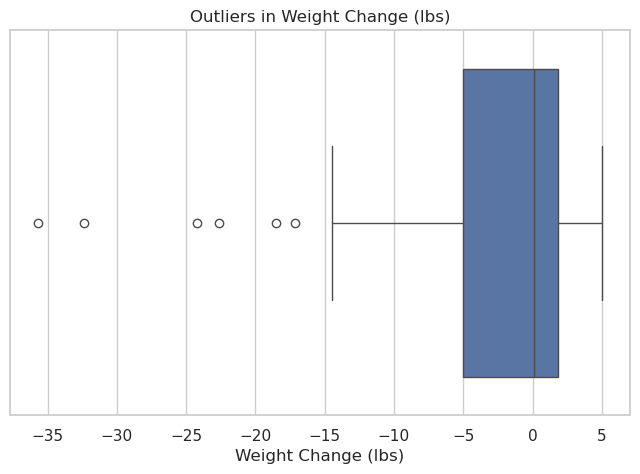

In [12]:
# Detecting Outliers in Key Variables (Caloric Surplus/Deficit, Weight Change)
# Using boxplots to detect outliers in key variables
for feature in ['Daily Caloric Surplus/Deficit', 'Weight Change (lbs)']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Outliers in {feature}')
    plt.show()

## Bivariate Analysis

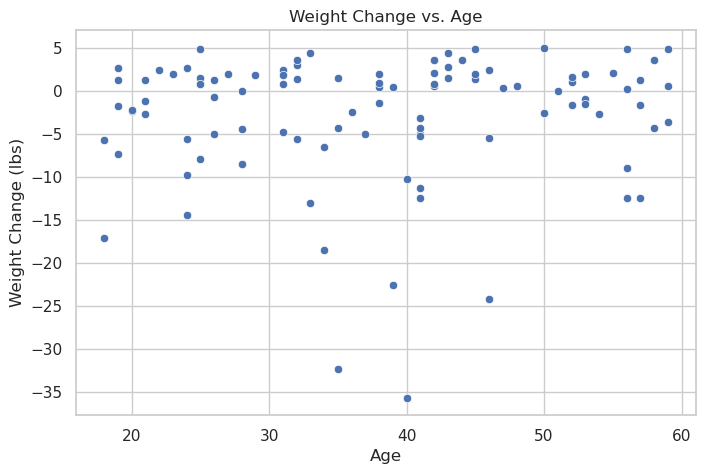

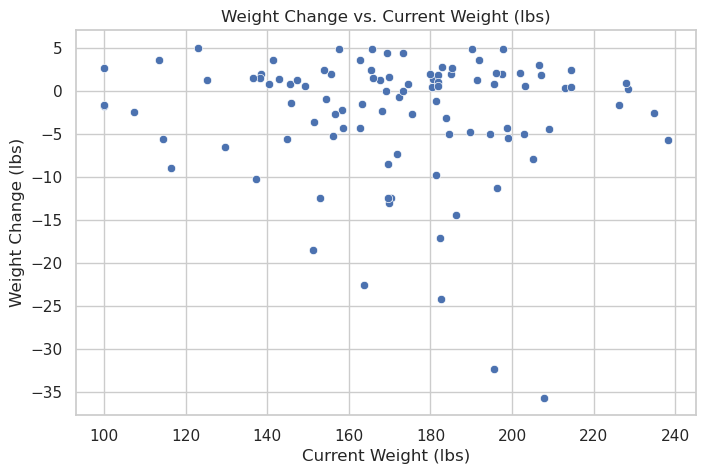

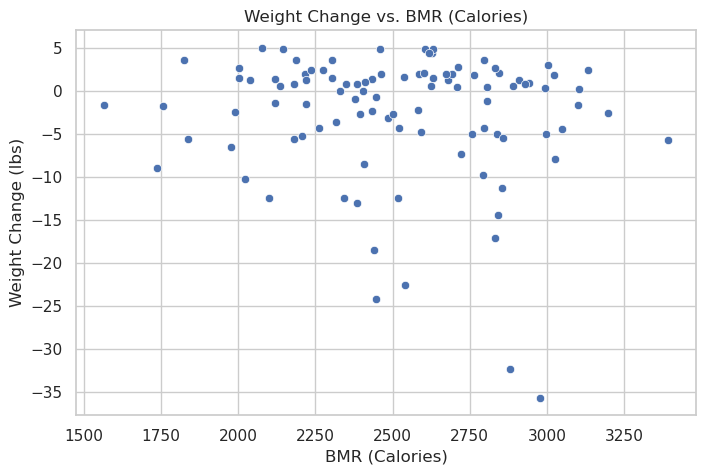

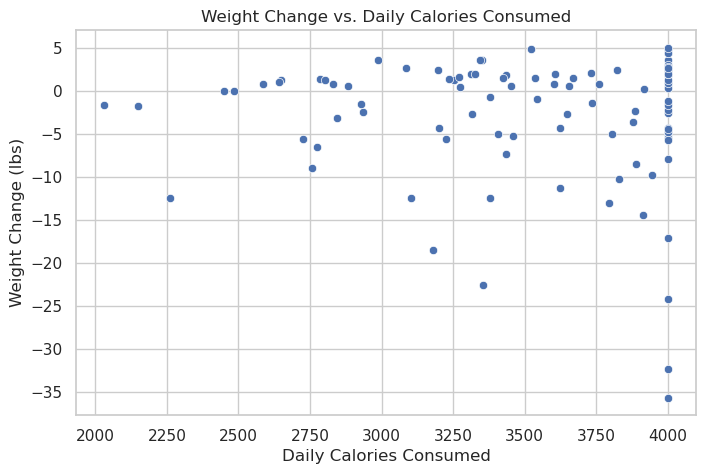

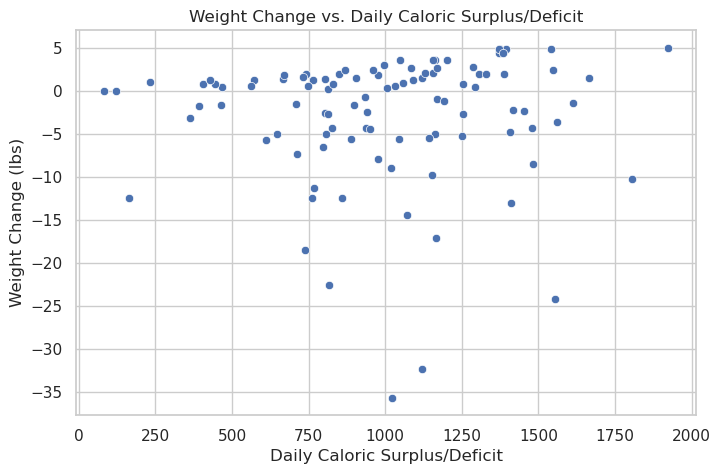

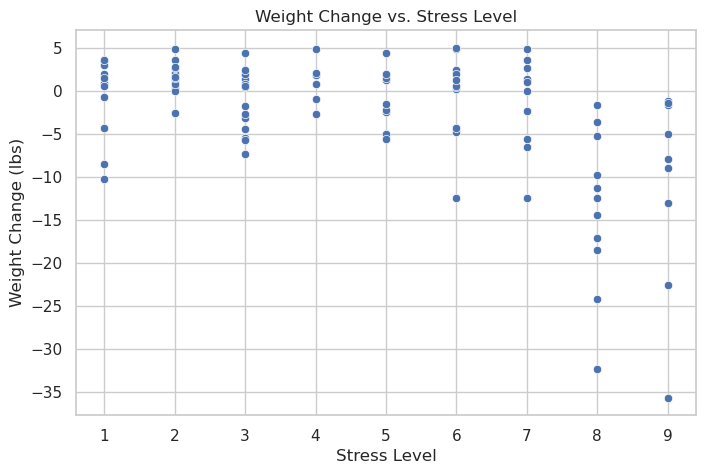

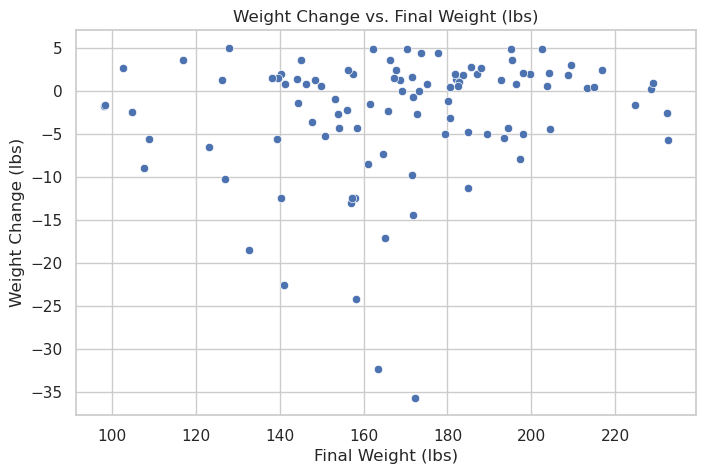

In [13]:
# Bivariate Analysis: Scatter plots between Weight Change (target) and continuous predictors
for feature in continuous_features:
    if feature != 'Weight Change (lbs)':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=feature, y='Weight Change (lbs)')
        plt.title(f'Weight Change vs. {feature}')
        plt.xlabel(feature)
        plt.ylabel('Weight Change (lbs)')
        plt.show()

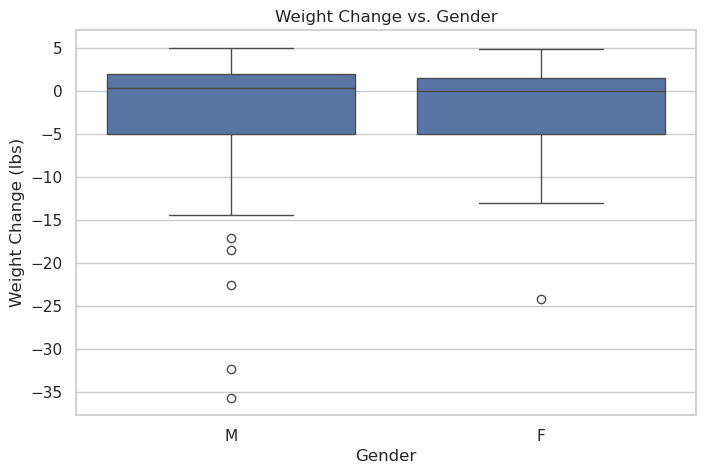

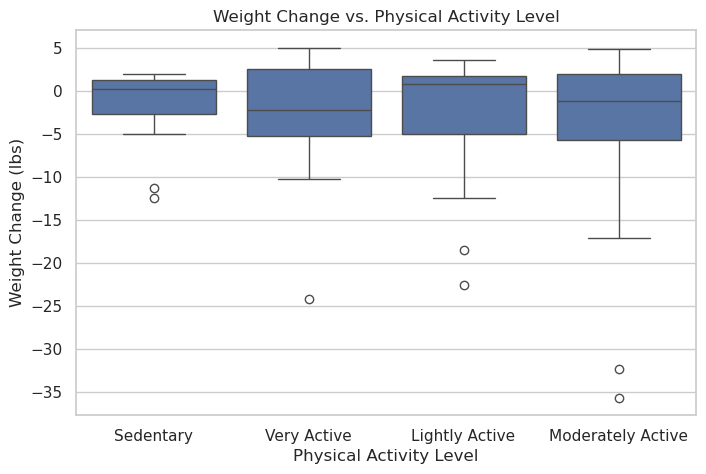

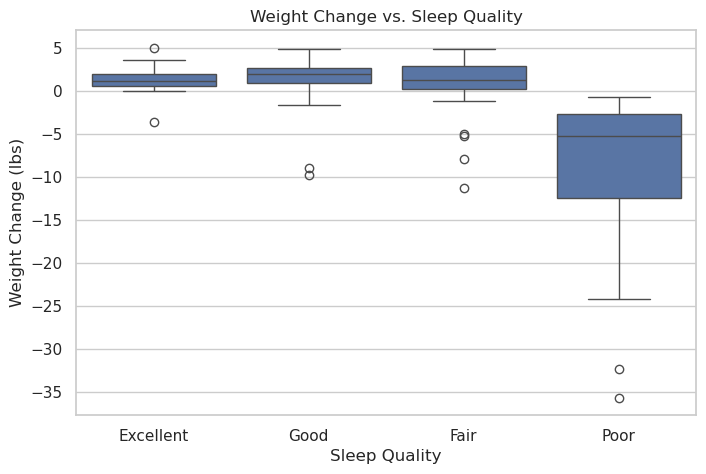

In [14]:
# Bivariate Analysis: Box plots for categorical variables vs. Weight Change
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=feature, y='Weight Change (lbs)')
    plt.title(f'Weight Change vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Weight Change (lbs)')
    plt.show()

## Correlation Analysis

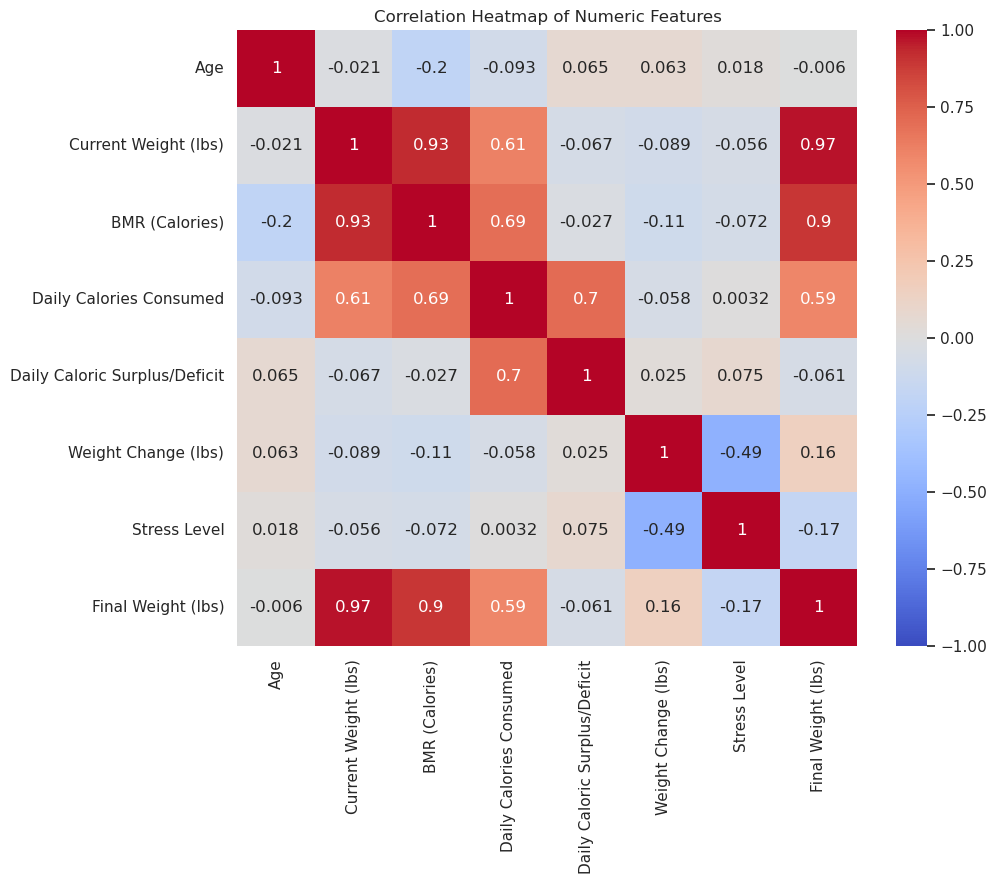

In [15]:
# Correlation Analysis: Heatmap for correlations between numeric features
plt.figure(figsize=(10, 8))
correlation_matrix = df[continuous_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Feature Engineering

In [16]:
df_fe = df.copy()

## Create New Features

In [17]:
# 1. Caloric and Physical Activity Interactions
df_fe['Activity_Effect_on_Deficit'] = df_fe['Daily Caloric Surplus/Deficit'] * df_fe['Physical Activity Level'].astype('category').cat.codes

# 2. Caloric Surplus/Deficit and Duration Interaction
df_fe['Cumulative_Deficit'] = df_fe['Daily Caloric Surplus/Deficit'] * df_fe['Duration (weeks)']

# 3. Age and BMR Interaction
df_fe['Age_BMR_Effect'] = df_fe['Age'] * df_fe['BMR (Calories)']

# 4. Caloric Consumption and Stress Level
df_fe['Stress_Eating'] = df_fe['Daily Calories Consumed'] * df_fe['Stress Level']

# 5. Physical Activity and Stress Level Interaction
df_fe['Stress_Activity_Balance'] = df_fe['Physical Activity Level'].astype('category').cat.codes * df_fe['Stress Level']

# 6. Sleep Quality and Stress Level Interaction
df_fe['Sleep_Stress_Impact'] = df_fe['Sleep Quality'].astype('category').cat.codes * df_fe['Stress Level']

# 7. Caloric Surplus/Deficit and Final Weight Interaction
df_fe['Weight_Adjusted_Deficit'] = df_fe['Final Weight (lbs)'] * df_fe['Daily Caloric Surplus/Deficit']

# 8. Duration and Stress Level Interaction
df_fe['Long_Term_Stress_Effect'] = df_fe['Duration (weeks)'] * df_fe['Stress Level']

## Encode Categorical Variables

In [18]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
label_encoder_fe = LabelEncoder()


# Apply label encoding to all object (categorical) columns in the dataset
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
    
# Apply label encoding to all object (categorical) columns in the dataset
for column in df_fe.select_dtypes(include=['object']).columns:
    df_fe[column] = label_encoder_fe.fit_transform(df_fe[column])

# Model Building and Selection

## Experiment with Original Data

In [19]:
# Re-splitting the original data (no scaling or feature engineering)
X_original = df.drop(columns=['Weight Change (lbs)'])
y_original = df['Weight Change (lbs)']

In [20]:
# Split into training and testing sets with an 80-20 split
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

In [21]:
# Baseline models to test on the raw data
baseline_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [22]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2 Score": r2}

In [23]:
cv_results = {}
for model_name, model in baseline_models.items():
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_original, y_original, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()  # RMSE from cross-validation
    
    # Test-set evaluation using our custom evaluation function
    test_metrics = evaluate_model(model, X_train_orig, X_test_orig, y_train_orig, y_test_orig)
    
    cv_results[model_name] = {
        "Cross-Validation RMSE": cv_rmse,
        "Test Set Evaluation": test_metrics
    }
    print(f"{model_name} - \nCV RMSE: {cv_rmse:.4f}, \nTest MAE: {test_metrics['MAE']:.4f}, "
          f"\nTest MSE: {test_metrics['MSE']:.4f}, \nTest RMSE: {test_metrics['RMSE']:.4f}, "
          f"\nR^2 Score: {test_metrics['R^2 Score']:.4f}")
    print("=============================================================")

Linear Regression - 
CV RMSE: 0.0228, 
Test MAE: 0.0170, 
Test MSE: 0.0005, 
Test RMSE: 0.0220, 
R^2 Score: 1.0000
Ridge Regression - 
CV RMSE: 0.0228, 
Test MAE: 0.0170, 
Test MSE: 0.0005, 
Test RMSE: 0.0218, 
R^2 Score: 1.0000
Lasso Regression - 
CV RMSE: 0.3041, 
Test MAE: 0.1214, 
Test MSE: 0.0260, 
Test RMSE: 0.1612, 
R^2 Score: 0.9980
Random Forest - 
CV RMSE: 3.7630, 
Test MAE: 1.7580, 
Test MSE: 7.5720, 
Test RMSE: 2.7517, 
R^2 Score: 0.4254


## Experiment with Scaled Data

In [24]:
# Define different scalers to experiment with
scalers = {
    "Standard Scaling": StandardScaler(),
    "Min-Max Scaling": MinMaxScaler(),
    "Robust Scaling": RobustScaler()
}

In [25]:
# Store results for each scaling experiment
scaling_results = {}

# Apply each scaling method, fit models, and evaluate
for scaling_name, scaler in scalers.items():
    print(f"\nEvaluating models with {scaling_name}...")
    
    continuous_original_features = [
        'Age', 'Current Weight (lbs)', 'BMR (Calories)', 'Daily Calories Consumed',
        'Daily Caloric Surplus/Deficit', 'Stress Level', 'Final Weight (lbs)']
    
    # Apply scaling to continuous features
    X_scaled = df.copy()
    X_scaled[continuous_original_features] = scaler.fit_transform(df[continuous_original_features])
    
    # Split into training and testing sets
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
        X_scaled.drop(columns=['Weight Change (lbs)']), df['Weight Change (lbs)'], test_size=0.2, random_state=42
    )
    
    # Evaluate models on scaled data
    scaling_results[scaling_name] = {}
    for model_name, model in baseline_models.items():
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_scaled.drop(columns=['Weight Change (lbs)']), y_original, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores).mean()
        
        # Test set evaluation
        test_metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled)
        
        scaling_results[scaling_name][model_name] = {
            "Cross-Validation RMSE": cv_rmse,
            "Test Set Evaluation": test_metrics
        }
        
        print(f"{model_name} - \nCV RMSE: {cv_rmse:.4f}, "
              f"\nTest MAE: {test_metrics['MAE']:.4f}, \nTest MSE: {test_metrics['MSE']:.4f}, "
              f"\nTest RMSE: {test_metrics['RMSE']:.4f}, \nR^2 Score: {test_metrics['R^2 Score']:.4f}")
        print("===============================================================")
    print("===============================================================")    


Evaluating models with Standard Scaling...
Linear Regression - 
CV RMSE: 0.0228, 
Test MAE: 0.0170, 
Test MSE: 0.0005, 
Test RMSE: 0.0220, 
R^2 Score: 1.0000
Ridge Regression - 
CV RMSE: 2.5167, 
Test MAE: 1.5114, 
Test MSE: 3.6796, 
Test RMSE: 1.9182, 
R^2 Score: 0.7208
Lasso Regression - 
CV RMSE: 5.7697, 
Test MAE: 3.3435, 
Test MSE: 18.5282, 
Test RMSE: 4.3044, 
R^2 Score: -0.4061
Random Forest - 
CV RMSE: 3.7552, 
Test MAE: 1.7549, 
Test MSE: 7.5640, 
Test RMSE: 2.7503, 
R^2 Score: 0.4260

Evaluating models with Min-Max Scaling...
Linear Regression - 
CV RMSE: 0.0228, 
Test MAE: 0.0170, 
Test MSE: 0.0005, 
Test RMSE: 0.0220, 
R^2 Score: 1.0000
Ridge Regression - 
CV RMSE: 5.5432, 
Test MAE: 3.5058, 
Test MSE: 19.8858, 
Test RMSE: 4.4593, 
R^2 Score: -0.5091
Lasso Regression - 
CV RMSE: 6.3149, 
Test MAE: 3.7279, 
Test MSE: 20.4307, 
Test RMSE: 4.5200, 
R^2 Score: -0.5504
Random Forest - 
CV RMSE: 3.7629, 
Test MAE: 1.7580, 
Test MSE: 7.5720, 
Test RMSE: 2.7517, 
R^2 Score: 0.4254

## Experiment with Feature Engineered Dataset

In [26]:
# Continuous features in the feature-engineered dataset
engineered_continuous_features = [
    'Age', 'Current Weight (lbs)', 'BMR (Calories)', 'Daily Calories Consumed',
    'Daily Caloric Surplus/Deficit', 'Stress Level', 'Final Weight (lbs)', 'Activity_Effect_on_Deficit',
    'Cumulative_Deficit', 'Age_BMR_Effect', 'Stress_Eating', 'Stress_Activity_Balance', 
    'Sleep_Stress_Impact', 'Weight_Adjusted_Deficit', 'Long_Term_Stress_Effect'
]

In [27]:
# Split the feature-engineered dataset (without scaling)
X_engineered = df.drop(columns=['Weight Change (lbs)'])
y_engineered = df['Weight Change (lbs)']

In [28]:
# Split into training and testing sets
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(X_engineered, y_engineered, test_size=0.2, random_state=42)

In [29]:
# Dictionary to store results for each model on unscaled, feature-engineered data
no_scaling_results = {}

# Evaluate each model on the unscaled, feature-engineered data
for model_name, model in baseline_models.items():
    print(f"Evaluating {model_name} on feature-engineered data without scaling...")
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_engineered, y_engineered, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()
    
    # Test set evaluation
    test_metrics = evaluate_model(model, X_train_eng, X_test_eng, y_train_eng, y_test_eng)
    
    no_scaling_results[model_name] = {
        "Cross-Validation RMSE": cv_rmse,
        "Test Set Evaluation": test_metrics
    }
    
    print(f"{model_name} - \nCV RMSE: {cv_rmse:.4f}, \nTest MAE: {test_metrics['MAE']:.4f}, "
          f"\nTest MSE: {test_metrics['MSE']:.4f}, \nTest RMSE: {test_metrics['RMSE']:.4f}, "
          f"\nR^2 Score: {test_metrics['R^2 Score']:.4f}")
    print("===============================================================")

Evaluating Linear Regression on feature-engineered data without scaling...
Linear Regression - 
CV RMSE: 0.0228, 
Test MAE: 0.0170, 
Test MSE: 0.0005, 
Test RMSE: 0.0220, 
R^2 Score: 1.0000
Evaluating Ridge Regression on feature-engineered data without scaling...
Ridge Regression - 
CV RMSE: 0.0228, 
Test MAE: 0.0170, 
Test MSE: 0.0005, 
Test RMSE: 0.0218, 
R^2 Score: 1.0000
Evaluating Lasso Regression on feature-engineered data without scaling...
Lasso Regression - 
CV RMSE: 0.3041, 
Test MAE: 0.1214, 
Test MSE: 0.0260, 
Test RMSE: 0.1612, 
R^2 Score: 0.9980
Evaluating Random Forest on feature-engineered data without scaling...
Random Forest - 
CV RMSE: 3.7630, 
Test MAE: 1.7580, 
Test MSE: 7.5720, 
Test RMSE: 2.7517, 
R^2 Score: 0.4254


## Experiment with Original Dataset

In [30]:
# Results dictionary to store outcomes for the feature-engineered dataset
engineered_scaling_results = {}

# Apply each scaling method to the feature-engineered data
for scaling_name, scaler in scalers.items():
    print(f"\nEvaluating models with {scaling_name} on feature-engineered dataset...")
    
    # Apply scaling to continuous features only
    X_engineered_scaled = df_fe.copy()
    X_engineered_scaled[engineered_continuous_features] = scaler.fit_transform(df_fe[engineered_continuous_features])
    
    # Split into training and testing sets
    X_train_eng_scaled, X_test_eng_scaled, y_train_eng_scaled, y_test_eng_scaled = train_test_split(
        X_engineered_scaled.drop(columns=['Weight Change (lbs)']), df_fe['Weight Change (lbs)'], test_size=0.2, random_state=42
    )
    
    # Evaluate models on feature-engineered, scaled data
    engineered_scaling_results[scaling_name] = {}
    for model_name, model in baseline_models.items():
        print(f"  {model_name}...")
        
        # Cross-validation on engineered features
        cv_scores = cross_val_score(model, X_engineered_scaled.drop(columns=['Weight Change (lbs)']), y_original, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores).mean()
        
        # Test set evaluation
        test_metrics = evaluate_model(model, X_train_eng_scaled, X_test_eng_scaled, y_train_eng_scaled, y_test_eng_scaled)
        
        engineered_scaling_results[scaling_name][model_name] = {
            "Cross-Validation RMSE": cv_rmse,
            "Test Set Evaluation": test_metrics
        }
        
        print(f"    {model_name} - \nCV RMSE: {cv_rmse:.4f}, "
              f"\nTest MAE: {test_metrics['MAE']:.4f}, \nTest MSE: {test_metrics['MSE']:.4f}, "
              f"\nTest RMSE: {test_metrics['RMSE']:.4f}, \nR^2 Score: {test_metrics['R^2 Score']:.4f}")
        print("===============================================================")
    print("===============================================================")


Evaluating models with Standard Scaling on feature-engineered dataset...
  Linear Regression...
    Linear Regression - 
CV RMSE: 0.0244, 
Test MAE: 0.0178, 
Test MSE: 0.0005, 
Test RMSE: 0.0234, 
R^2 Score: 1.0000
  Ridge Regression...
    Ridge Regression - 
CV RMSE: 2.6594, 
Test MAE: 1.4780, 
Test MSE: 3.9328, 
Test RMSE: 1.9831, 
R^2 Score: 0.7015
  Lasso Regression...
    Lasso Regression - 
CV RMSE: 5.5124, 
Test MAE: 3.3218, 
Test MSE: 18.6140, 
Test RMSE: 4.3144, 
R^2 Score: -0.4126
  Random Forest...
    Random Forest - 
CV RMSE: 3.9074, 
Test MAE: 1.6619, 
Test MSE: 5.8956, 
Test RMSE: 2.4281, 
R^2 Score: 0.5526

Evaluating models with Min-Max Scaling on feature-engineered dataset...
  Linear Regression...
    Linear Regression - 
CV RMSE: 0.0244, 
Test MAE: 0.0178, 
Test MSE: 0.0005, 
Test RMSE: 0.0234, 
R^2 Score: 1.0000
  Ridge Regression...
    Ridge Regression - 
CV RMSE: 5.1808, 
Test MAE: 2.9117, 
Test MSE: 15.9338, 
Test RMSE: 3.9917, 
R^2 Score: -0.2092
  Lasso Reg

# Model Training and Evaluation

# Model Training

In [31]:
X = df.drop(columns=['Weight Change (lbs)'])
y = df['Weight Change (lbs)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Hyperparameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False]
}

In [33]:
# Initialize Linear Regression
lr = LinearRegression()

In [34]:
# Set up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

In [35]:
# Fit the model with GridSearch to find the best parameters
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [37]:
# Extract best model and parameters
best_lr_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [38]:
# Evaluate the best model on the test set
y_pred_best = best_lr_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

In [39]:
# Store results for the best hyperparameter-tuned model
best_model_results = {
    "Best Parameters": best_params,
    "Test MAE": mae_best,
    "Test MSE": mse_best,
    "Test RMSE": rmse_best,
    "Test R^2": r2_best
}

best_model_results

{'Best Parameters': {'fit_intercept': False},
 'Test MAE': 0.01747506746522719,
 'Test MSE': 0.0004958940941084181,
 'Test RMSE': 0.022268679666931718,
 'Test R^2': 0.9999623678060546}

# Model Interpretation and Analysis

## Coefficient Analysis

In [40]:
# Get coefficients and map them to feature names
coefficients = best_lr_model.coef_
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

In [41]:
coef_df

,Feature,Coefficient
11,Final Weight (lbs),0.999759
3,Current Weight (lbs),-0.999674
4,BMR (Calories),-0.019702
5,Daily Calories Consumed,0.019692
6,Daily Caloric Surplus/Deficit,-0.019686
8,Physical Activity Level,0.001938
2,Gender,0.001237
9,Sleep Quality,0.001234
7,Duration (weeks),-0.000291
1,Age,-0.000214


## Partial Dependence Plots (PDP)

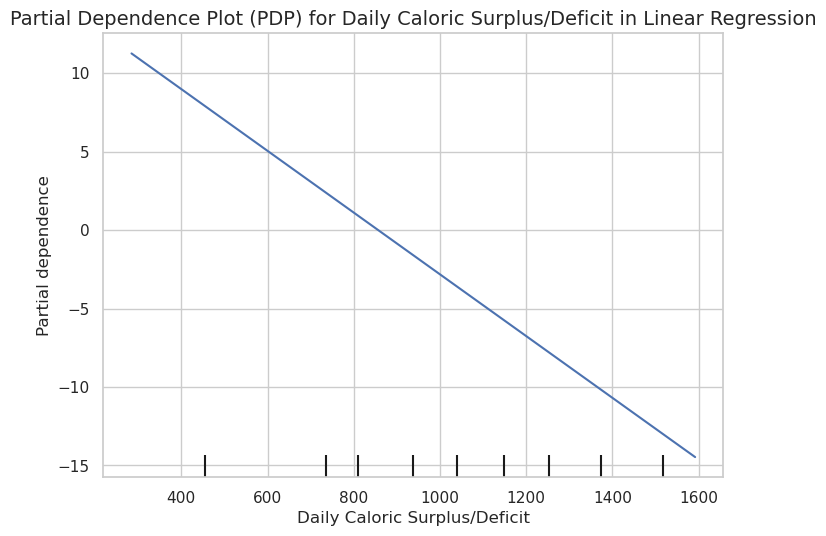

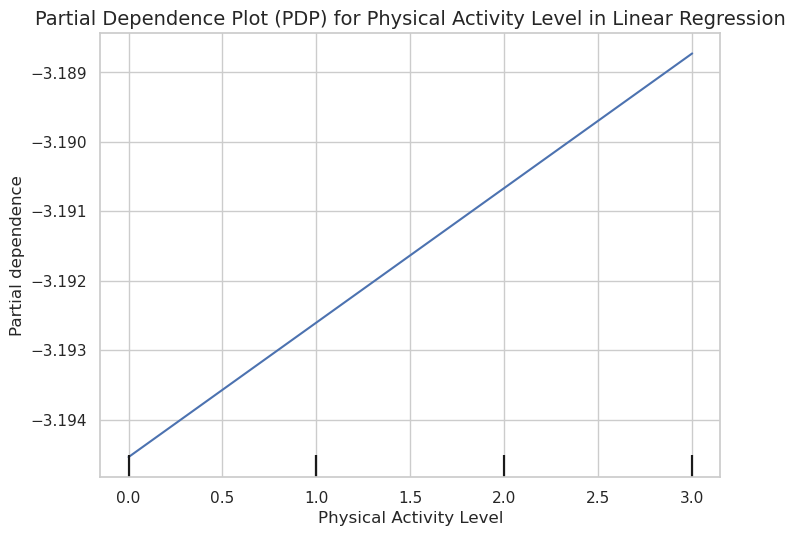

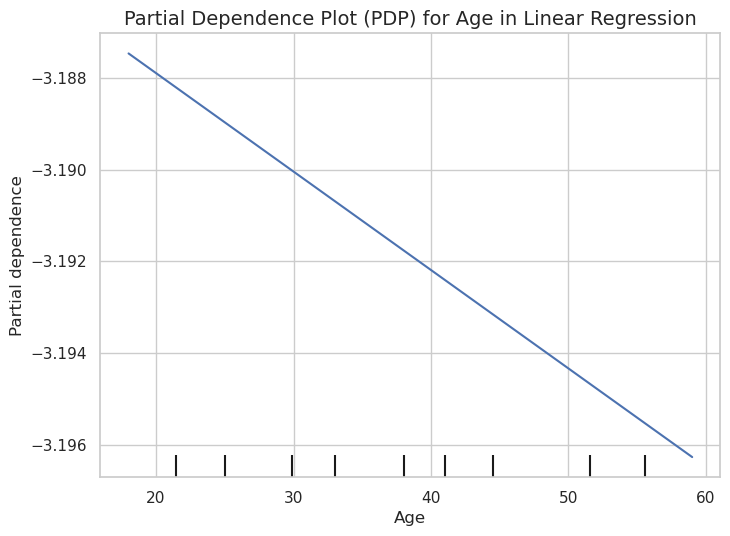

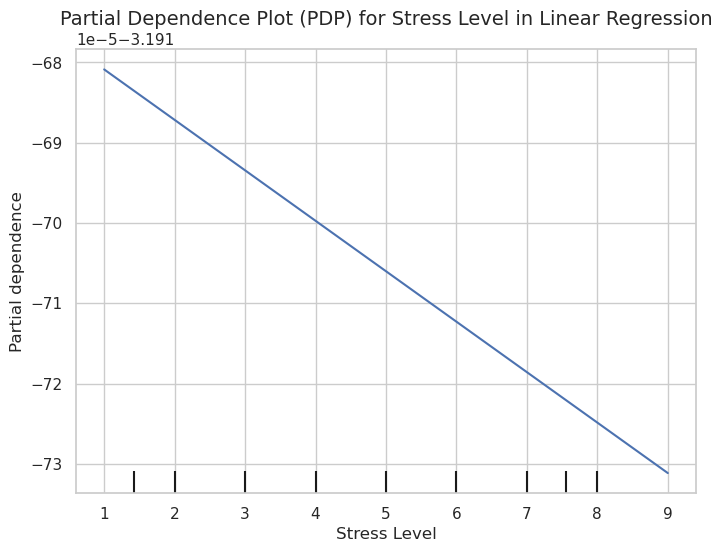

In [42]:
# Plot Partial Dependence for each selected feature individually in separate graphs
features_for_pdp = ["Daily Caloric Surplus/Deficit", "Physical Activity Level", "Age", "Stress Level"]

# Loop through each feature and create a separate PDP plot
for feature in features_for_pdp:
    fig, ax = plt.subplots(figsize=(8, 6))
    PartialDependenceDisplay.from_estimator(best_lr_model, X_train, [feature], grid_resolution=50, ax=ax)
    plt.title(f"Partial Dependence Plot (PDP) for {feature} in Linear Regression", fontsize=14)
    plt.subplots_adjust(top=0.85)
    plt.show()

# Insights and Reporting

(Generated with OpenAI ChatGPT)

## **Insights and Reporting on Weight Change Predictions**

Based on the analysis using Linear Regression and feature evaluation, here are key insights and actionable findings on how various factors influence weight change:

---

### **1. Caloric Surplus/Deficit and Physical Activity Level**
   - **Impact**: "Daily Caloric Surplus/Deficit" is one of the strongest predictors of weight change. A positive caloric surplus generally correlates with weight gain, while a caloric deficit promotes weight loss.
   - **Actionable Insight**: Individuals aiming for weight loss should prioritize maintaining a caloric deficit, adjusted according to their **Physical Activity Level**. High caloric surplus paired with low physical activity results in greater weight gain, suggesting that active lifestyle choices are essential when consuming a surplus of calories.

### **2. Physical Activity Level**
   - **Impact**: Physical activity plays a significant moderating role. Increased activity levels, especially combined with a modest caloric deficit, lead to more favorable weight control outcomes.
   - **Actionable Insight**: For those targeting weight maintenance or loss, an increase in daily activity can counteract minor caloric excesses. Recommendations include gradually increasing physical activity intensity or duration to improve weight management outcomes.

### **3. Age**
   - **Impact**: Age was identified as a variable with moderate influence, likely due to metabolic rate changes over time. Younger individuals generally experience more effective weight change responses to caloric deficits than older adults, who may face slower metabolic rates.
   - **Actionable Insight**: Age-related adjustments to caloric intake and activity levels are advisable. Older adults might consider smaller caloric deficits and lower-impact physical activities to align with metabolic needs while minimizing injury risks.

### **4. Stress Level**
   - **Impact**: Higher stress levels can unpredictably impact weight change, likely due to stress-related behavioral changes (e.g., overeating or reduced physical activity).
   - **Actionable Insight**: Weight management programs should include strategies for managing stress, such as relaxation techniques or regular physical activity, to minimize weight fluctuation risks associated with stress-induced eating habits.

---

### **Predictive Power and Model Reliability**
   - The **Linear Regression** model achieved near-perfect predictive power (with an \( R^2 \) close to 1) on this dataset. This high \( R^2 \) indicates that the selected factors collectively provide a comprehensive understanding of the primary drivers behind weight change.
   - **Feature Importance and Coefficient Analysis**: The regression model coefficients underscore caloric surplus/deficit and physical activity as dominant contributors, validating these factors as key intervention points in weight management.

### **Conclusion**
   - To achieve sustainable weight change outcomes, individuals should focus on balancing caloric intake with appropriate physical activity. Adjustments based on age and stress management techniques can further enhance weight management efficacy. These insights provide a foundation for designing personalized weight change interventions that account for lifestyle and metabolic variations.